# Investigation on Student assessment Data

## Investigation Overview

In this investigation, We wanted to see what variables can effect students assessment score positivaly or negativaly. the results of this invistgation aim to improve the learning process by understanding what factors can contribute in achieving better scores in class assessment. 

## Dataset Overview

The data in this experiement called PISA which stands for Programmee for International Student Assessment. PISA is a survey of students' skills and knowledge along with other features. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. 

Original dataset contains 510,000 students with 635 features. The dataset was modified to include only 50 features to simplfiy the exploration task in this project. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

> Loading the Dataset

In [2]:
df =pd.read_csv('pisa2012_modified.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222626 entries, 0 to 222625
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     222626 non-null  int64  
 1   CNT                       222626 non-null  object 
 2   NC                        222626 non-null  object 
 3   SchoolID                  222626 non-null  int64  
 4   StudentID                 222626 non-null  int64  
 5   Grade                     222626 non-null  int64  
 6   BirthYear                 222626 non-null  int64  
 7   Gender                    222626 non-null  object 
 8   Late                      218791 non-null  object 
 9   SkipWholedDay             218807 non-null  object 
 10  AtHome_mother             212437 non-null  object 
 11  AtHome_mother.1           203384 non-null  object 
 12  Mother_highest_Schooling  208147 non-null  object 
 13  Mother_Job_State          213424 non-null  o

> First, we have dropped the index column since it pandas dataframe already creates one

> This dataset contains 222626 entries with 50 features. The original dataset feature names has been modified to be represented in easier form. for example gender column in the original dataset is called ST04Q01. we modified most of the columns different names that can best represent the data in that column. For more information about each feature discription, please refer to the documnetation in the readme file through this link. 

> There is no duplicated data in this dataset

### What is/are the main feature(s) of interest in your dataset?

> **in this dataset, we will try to invistigate if different learning stratgies can effect the learning outcomes?  the learning stratgies are represented by three variables:** 

Learning_Strategies_1:  Important Parts vs. Existing Knowledge vs. Learn by Heart

Learning_Strategies_2:  Other Subjects vs. Learning Goals vs. Rehearse Problems

Learning_Strategies_4:  Repeat Examples vs. Everyday Applications vs. More Information

> **we wanted to check if the teaching stratgies can effect the learning outcomes through the follwing variables:** 

T_strategy1 - set clear goals 

T_strategy2 - Encourages Thinking and Reasoning

T_strategy3 - Differentiates Between Students When Giving Tasks

T_strategy4 - Checks Understanding

T_strategy5  - Helps Learn from Mistakes

T_strategy6 - Apply What We Learned

> **we also wanted to check if certain possession are assossicated with better learning outcomes: these possison include:** 

Possessions_own room - If the student owns a seperate room 

Possessions_study_place - the student has a study place

Possessions_computer - the student owns a computer 

Possessions_textbooks - the student owns course textbooks

BooksAtHome -  number of books at student's home

>**lastly, we wanted to see if the school enviroment and student perception on their schools affect their learning process. 4 features were included in the invistgation process:** 

School_Enviroment1 - Make Friends Easily

School_Enviroment2 - Things Are Ideal at School

School_Enviroment3 -  Feel Lonely at School

School_Enviroment4 -  Feel Happy at School



## Univariate Exploration

Under this section, we will tackle single feature to see their distribution.

### *Grade Distribution*

First, we will explore the grade columns to see what is the most common grade in our data. 

(1.0, 15.0)

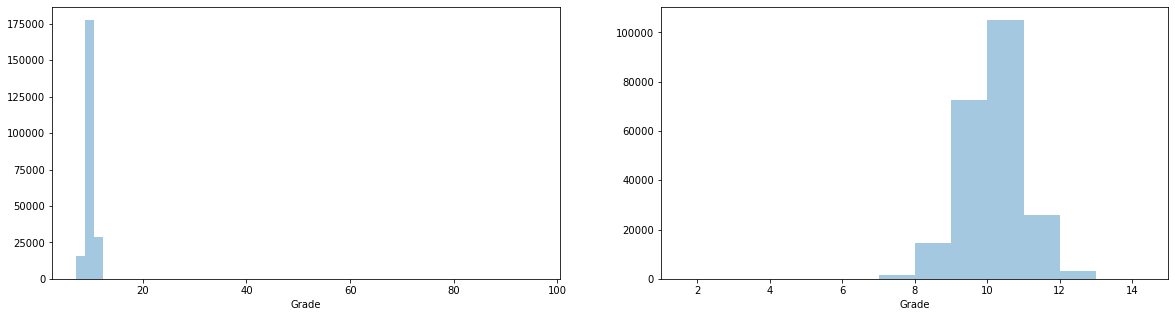

In [5]:
plt.figure(figsize = [20, 5])


plt.subplot(1, 2, 1)
sb.distplot(df['Grade'], kde=False)


plt.subplot(1, 2, 2)
#changing the bins to have one grade difference bettween each bin
bins = np.arange(1, df['Grade'].max()+1, 1)

#plotting
sb.distplot(df['Grade'], kde=False, bins=bins)

#to remove extreme outliers in grade 96 from the histogram
plt.xlim(1,15)

> ### **We can see from the second plot that most of the student count comes from grade 10 is the highest followed by grade 9 then grade 11.**

-------------------------------

### *Gender Distribution*

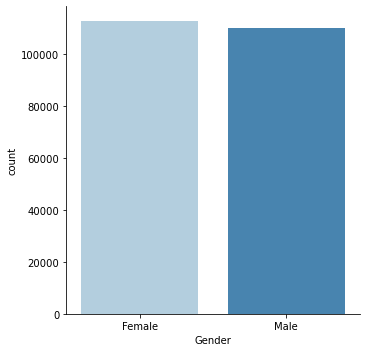

In [9]:
sb.catplot(x="Gender",kind='count', palette="Blues", data=df)

> ### **From the figure we can see that female students in this dataset is slightly higher than the male students. Since that the difference is small compared to the overall count (only 2000 entries), it better to not zoom in the difference in the figure to avoid biases in thinking that the number of female students is much higher than male students.**

--------------------------------------------------------

### *Counts of Mother higher Education Categories*

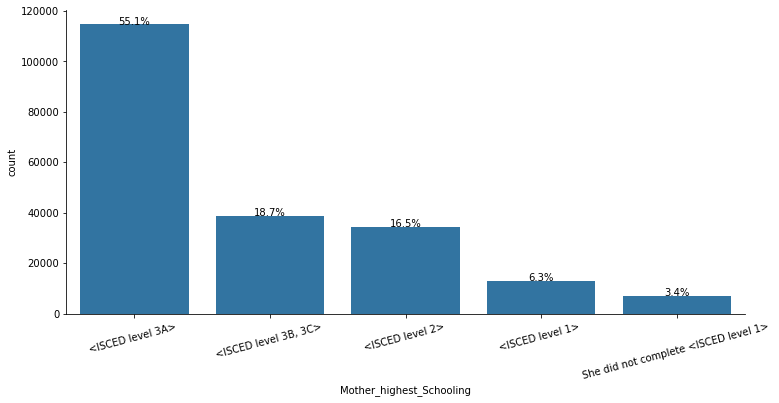

In [11]:
n_count = df['Mother_highest_Schooling'].value_counts().sum()

type_counts = df['Mother_highest_Schooling'].value_counts()

#to order the bars by their counts
type_order = type_counts.index

#finding the base color to color all bars with the same color
base_color = sb.color_palette()[0]

#plotting
sb.catplot(x="Mother_highest_Schooling",kind='count', color=base_color, data=df, order=type_order)

plt.gcf().set_size_inches(15, 5)

plt.xticks(rotation=15);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=15)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_count)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

> ### **Now we can see that more than the half of the particpants mothers completed ISCED level 3A. On the other hand, only 3.4% of particpants mothers didn't complete ISCED level 1.** 

---------------------------------------

### *Final Grade Weight Distribution*

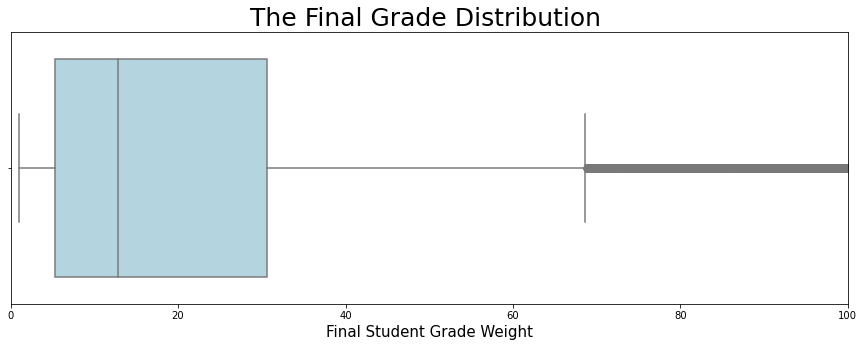

In [12]:
ax = sb.boxplot(x=df["W_FSTUWT"], color='lightblue')
ax.set_xlabel('Final Student Grade Weight', fontsize=15)
ax.set_title("The Final Grade Distribution ", fontsize=25);

plt.gcf().set_size_inches(15, 5)

plt.xlim((0,100));

> ### **We can see that most students final score falls around 10 to 14**

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in the
data.

### *Late Rate vs Final Scores*

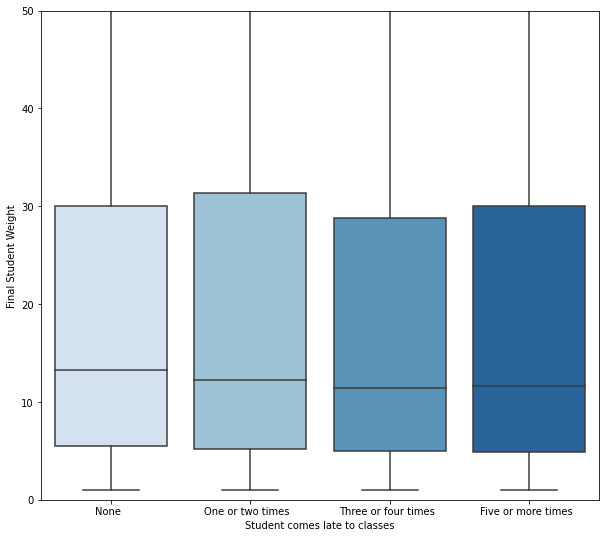

In [15]:
sb.boxplot(data = df, x = 'Late', y = 'W_FSTUWT', palette="Blues");

plt.gcf().set_size_inches(10, 9)
plt.xlabel('Student comes late to classes')
plt.ylabel('Final Student Weight')

plt.ylim((0,50));

> ### **We can observe from the figure that the student that have never came late has scored better on average. However, the students who came late one or two times have higher third quartile range than the others.**

----------------------------------------

### *Out of School Study Hours with parents vs Final Scores*

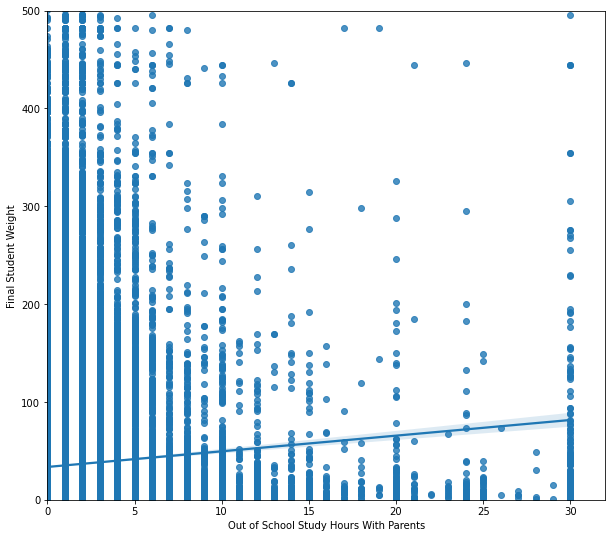

In [16]:
sb.regplot(data = df, x = 'OSST_Parents', y = 'W_FSTUWT');
plt.xlabel('Out of School Study Hours With Parents')
plt.ylabel('Final Student Weight')

plt.gcf().set_size_inches(10, 9)

plt.ylim((0,500));

plt.xlim((0,32));

> ### **At first glance, we can say that there is a negative relationship between hours of study at home with parents and the final student weight, but there is an exception at 30 hours per week where student weight have increased sharply.**

-------------------------------------------------------------------------------------

### *Mother Job State vs Final Scores*

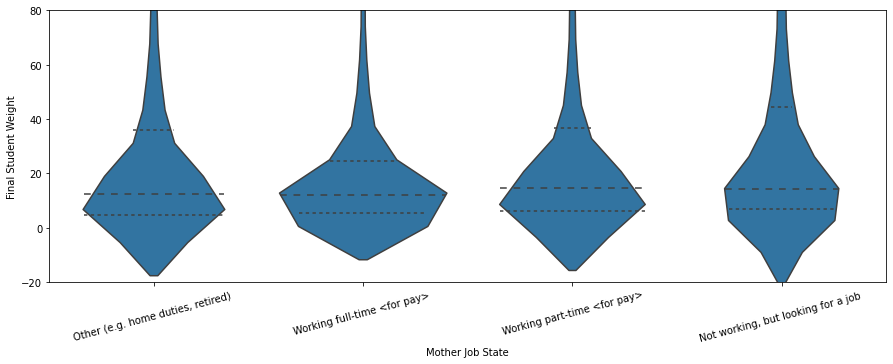

In [17]:
plt.figure(figsize = [15, 5])

sb.violinplot(data = df, x ='Mother_Job_State', y = 'W_FSTUWT', color=base_color, inner='quartile');

plt.xlabel('Mother Job State')
plt.ylabel('Final Student Weight')

plt.ylim((-20,80));
plt.xticks(rotation=15);


> ### **from the above figure, we can see that students that have stay at home mothers or with part time job score better on average than student that have mothers working full time job or other reasons.**

## Multivariate Exploration


Under this section, we will explore the relationship between more than two variables.

### *Math Anxiety vs Final Scores vs Joining Math clubs*

Text(0, 0.5, 'Final Student Weight')

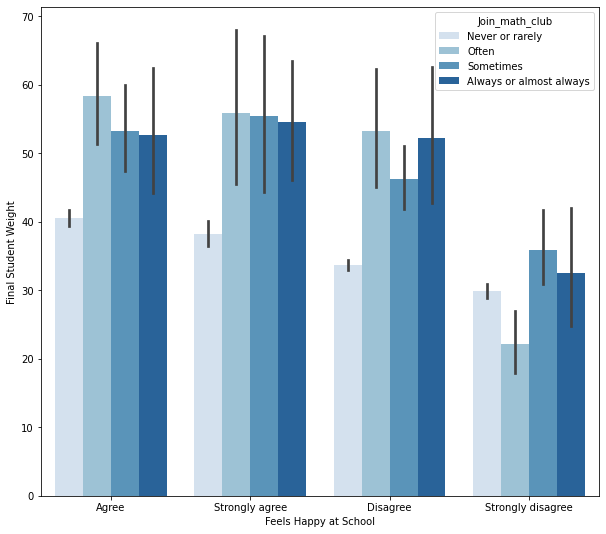

In [20]:
sb.barplot(data = df, x = 'Math_Anxiety', y='W_FSTUWT', hue = 'Join_math_club', palette="Blues")

plt.gcf().set_size_inches(10, 9)\

plt.xlabel('Feels Happy at School')
plt.ylabel('Final Student Weight')

> ### **Surprisingly, we can see that students with higher math anxity scores better at final student weight than those who don't even with they attend math clubs. Students who never or often join math club and don't have math Anxiety performed the worst among others.** 

------------------------------------------------------

### *Classes per week vs Final Score vs Math score*

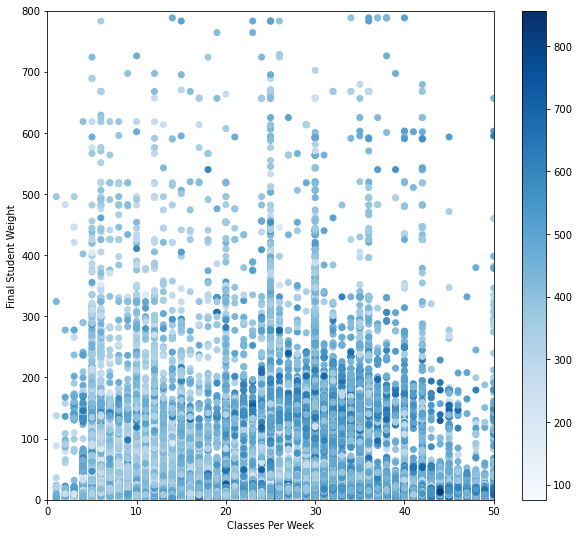

In [23]:
cm = plt.cm.get_cmap('Blues') #BuPu

plt.scatter(data = df, x ='Classes_per_week', y='W_FSTUWT', c = 'PV1MATH', cmap=cm)
plt.colorbar()

plt.gcf().set_size_inches(10, 9)

plt.xlabel('Classes Per Week')
plt.ylabel('Final Student Weight')

plt.xlim((0,50));
plt.ylim((0,800));

> ### **In the above figure, math assesment results is represented by the color bar. Darker points indicate higher results in math assessment while light ones indicate low scores. We can see from the figure that higher number of classes per week has resulted in better math results even though the average final student scores falls at the same level as other students with lower classes per week**

---------------------------------------

### *Teaching Strategy1 vs Final Scores vs Owning Textbooks*

In [21]:
df['T_strategy1'].value_counts()

Most Lessons            53437
Every Lesson            50246
Some Lessons            30152
Never or Hardly Ever     9525
Name: T_strategy1, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


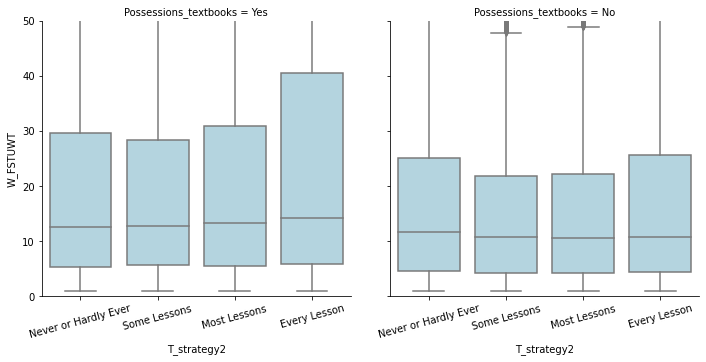

In [22]:
order_b =['Never or Hardly Ever','Some Lessons', 'Most Lessons', 'Every Lesson']

g = sb.FacetGrid(data = df, col = 'Possessions_textbooks', size = 4,col_wrap=4, sharey=True)

g.map(sb.boxplot, 'T_strategy2', 'W_FSTUWT', order = order_b, color='lightblue')

#to apply changes in all facets[]
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        
plt.gcf().set_size_inches(20, 5)

plt.ylim((0,50));


> ### **We can see from the figure that in case teachers encouraged thinking and reasoning while student owns the required text books, the student achieved better scores on average.**

# Summary

#### In this experiment, we investigated the factors that can contribute in better school achievements. From the results we can say that mother state affect student scores since that student who have stay at home mothers achieved better on average than the others. Secondly, we investigated the relationship between the teaching strategy and owning textbooks on student performance. The results show that teacher who encourage student’s creativity and at the same time the student own the required textbooks achieve better than the others on average. Furthermore, we checked between the number of classes per week and student performance on final scores and in math tests. Even though having more classes per weeks didn't seem to affect final score but it appears to affect positively their math score. 